# Simple Neural Network with Activation Function

- For Non Linear Regression

# Import 

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import helper_utils

# Define Dataset

In [3]:
# Combined dataset: bikes for short distances, cars for longer ones
distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

# Visualize Dataset

- Using **helper_utils.py**

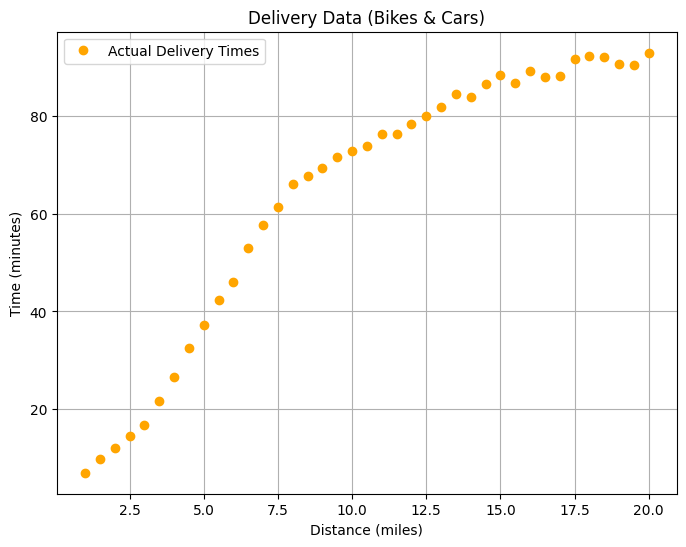

In [4]:
helper_utils.plot_data(distances, times)

# Normalize Dataset

- Standard technique that makes the training process more stable and effective by adjusting the scale of the data. 

- This adjustment helps prevent large distance values from dominating the learning process and keeps gradients stable during training.

In [5]:
# Calculate the mean and standard deviation for the 'distances' tensor
distances_mean = distances.mean()
distances_std = distances.std()

# Calculate the mean and standard deviation for the 'times' tensor
times_mean = times.mean()
times_std = times.std()

# Apply standardization to the distances.
distances_norm = (distances - distances_mean) / distances_std

# Apply standardization to the times.
times_norm = (times - times_mean) / times_std

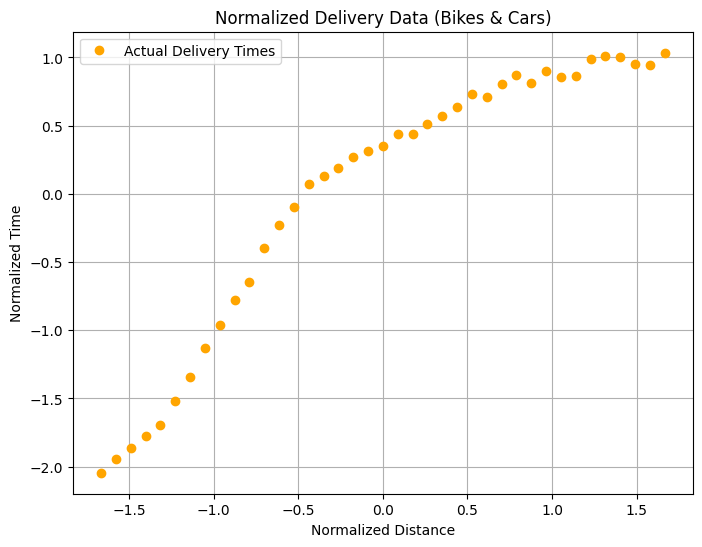

In [6]:
helper_utils.plot_data(distances_norm, times_norm, normalize=True)

# Build Non-Linear Model

In [7]:
# This line ensures that your results are reproducible and consistent every time.
torch.manual_seed(27)

model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)
print("New model initialized:", model)

New model initialized: Sequential(
  (0): Linear(in_features=1, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=1, bias=True)
)


# Define Loss Function and Optimizer

In [8]:
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train a Model

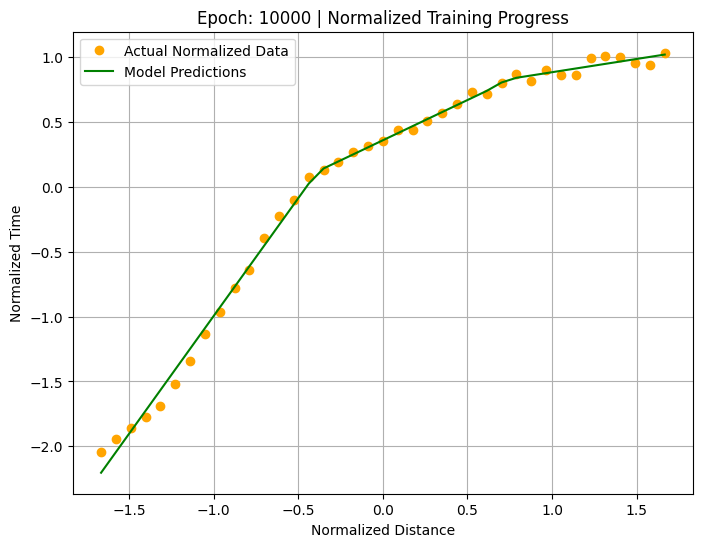


Training Complete.

Final Loss: 0.0029554457869380713


In [9]:
# Training loop
for epoch in range(10000):
    
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model(distances_norm)
    # Calculate the loss
    loss = loss_function(outputs, times_norm)
    # Calculate adjustments (backward pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()

    # Create a live plot every 50 epochs
    if (epoch + 1) % 50 == 0:
        helper_utils.plot_training_progress(
            epoch=epoch,
            loss=loss,
            model=model,
            distances_norm=distances_norm,
            times_norm=times_norm
        )

print("\nTraining Complete.")
loss_v1 = loss.item()
print(f"\nFinal Loss: {loss_v1}")

# Visualize Final Result

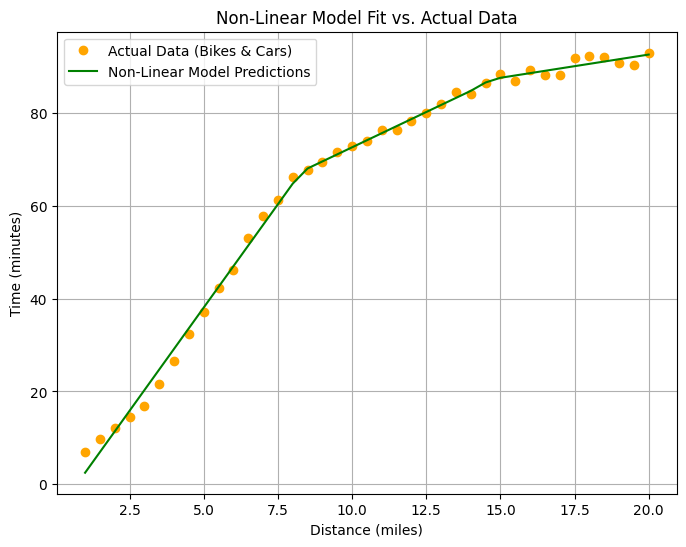

In [10]:
helper_utils.plot_final_fit(model, distances, times, distances_norm, times_std, times_mean)

# Predict a Distance

In [11]:
distance_to_predict = 5.1

In [12]:
# Use the torch.no_grad() context manager for efficient prediction
with torch.no_grad():
    # Normalize the input distance
    distance_tensor = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    new_distance_norm = (distance_tensor - distances_mean) / distances_std
    
    # Get the normalized prediction from the model
    predicted_time_norm = model(new_distance_norm)
    
    # De-normalize the output to get the actual time in minutes
    predicted_time_actual = (predicted_time_norm * times_std) + times_mean
    
    # --- Decision Making Logic ---
    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time_actual.item():.1f} minutes")
    
    # First, check if the delivery is possible within the 45-minute timeframe
    if predicted_time_actual.item() > 45:
        print("\nDecision: Do NOT promise the delivery in under 45 minutes.")
    else:
        # If it is possible, then determine the vehicle based on the distance
        if distance_to_predict <= 3:
            print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (<= 3 miles), use a bike.")
        else:
            print(f"\nDecision: Yes, delivery is possible. Since the distance is {distance_to_predict} miles (> 3 miles), use a car.")

Prediction for a 5.1-mile delivery: 39.0 minutes

Decision: Yes, delivery is possible. Since the distance is 5.1 miles (> 3 miles), use a car.


# Second Version

In [13]:
# This line ensures that your results are reproducible and consistent every time.
torch.manual_seed(27)

model_v2 = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)
print("New model initialized:", model_v2)

New model initialized: Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


## Train New Model

In [14]:
loss_function = nn.MSELoss()
optimizer = optim.SGD(model_v2.parameters(), lr=0.01)

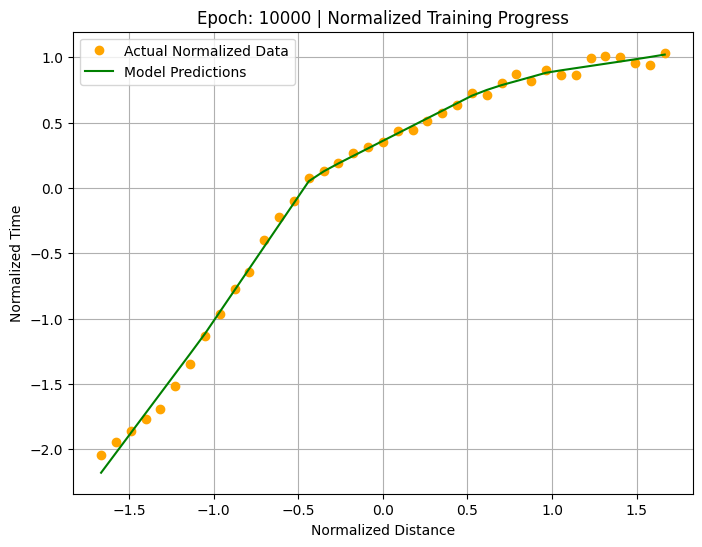


Training Complete.

Final Loss: 0.002344098873436451


In [15]:
# Training loop
for epoch in range(10000):
    
    # Reset the optimizer's gradients
    optimizer.zero_grad()
    # Make predictions (forward pass)
    outputs = model_v2(distances_norm)
    # Calculate the loss
    loss = loss_function(outputs, times_norm)
    # Calculate adjustments (backward pass)
    loss.backward()
    # Update the model's parameters
    optimizer.step()

    # Create a live plot every 50 epochs
    if (epoch + 1) % 50 == 0:
        helper_utils.plot_training_progress(
            epoch=epoch,
            loss=loss,
            model=model_v2,
            distances_norm=distances_norm,
            times_norm=times_norm
        )

print("\nTraining Complete.")
loss_v2 = loss.item()
print(f"\nFinal Loss: {loss_v2}")


## Final visualize version 2

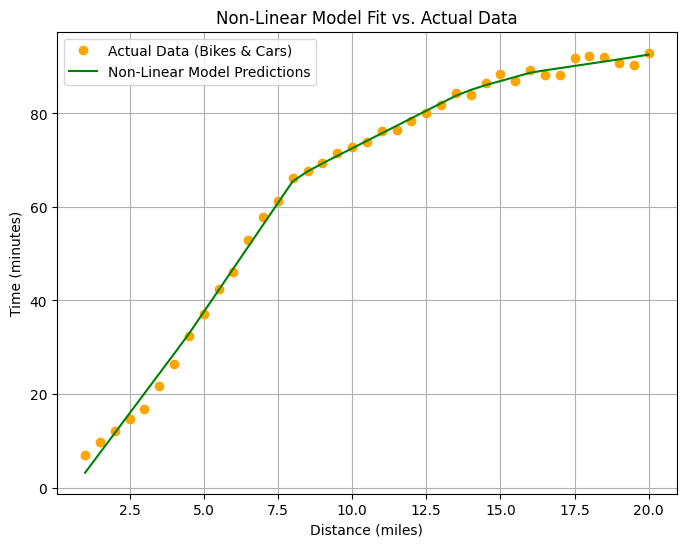

In [16]:
helper_utils.plot_final_fit(model_v2, distances, times, distances_norm, times_std, times_mean)

In [17]:
print("Loss function value for the first model:", loss_v1)
print("Loss function value for the second model:", loss_v2)

Loss function value for the first model: 0.0029554457869380713
Loss function value for the second model: 0.002344098873436451


## Inspecting Multi Layer Model

In [18]:
print("Model 1 Architecture:")
for i, layer in enumerate(model):
    print(f"Layer {i}: {layer}")

Model 1 Architecture:
Layer 0: Linear(in_features=1, out_features=3, bias=True)
Layer 1: ReLU()
Layer 2: Linear(in_features=3, out_features=1, bias=True)


In [19]:
# Get all weights and biases from model
for idx, layer in enumerate(model):
    if isinstance(layer, nn.Linear):
        weights = layer.weight.data.numpy()
        bias = layer.bias.data.numpy()
        print(f"Layer {idx}:")
        print(f"  Weights shape: {weights.shape}")
        print(f"  Weights:\n{weights}")
        print(f"  Bias: {bias}")
        print()

Layer 0:
  Weights shape: (3, 1)
  Weights:
[[ 0.91434026]
 [-1.2569767 ]
 [-0.75310713]]
  Bias: [-0.595223  -0.4856284  0.5505269]

Layer 2:
  Weights shape: (1, 3)
  Weights:
[[ 0.22349177 -0.95113283 -0.82355744]]
  Bias: [0.81307244]



In [21]:
print("Model 2 Architecture:")
for i, layer in enumerate(model_v2):
    print(f"Layer {i}: {layer}")

Model 2 Architecture:
Layer 0: Linear(in_features=1, out_features=10, bias=True)
Layer 1: ReLU()
Layer 2: Linear(in_features=10, out_features=1, bias=True)


In [20]:
# Get all weights and biases from model
for idx, layer in enumerate(model_v2):
    if isinstance(layer, nn.Linear):
        weights = layer.weight.data.numpy()
        bias = layer.bias.data.numpy()
        print(f"Layer {idx}:")
        print(f"  Weights shape: {weights.shape}")
        print(f"  Weights:\n{weights}")
        print(f"  Bias: {bias}")
        print()

Layer 0:
  Weights shape: (10, 1)
  Weights:
[[ 0.7280484 ]
 [-1.2306533 ]
 [ 0.22851107]
 [-0.7282097 ]
 [-0.43804434]
 [ 0.57162815]
 [-0.5390524 ]
 [-0.09093952]
 [-0.70937604]
 [-0.74150115]]
  Bias: [ 0.7744796  -0.52546936  0.41808134  0.7089625   0.3689948   0.14715476
  0.8293323  -0.49854922  0.49869508  0.4116453 ]

Layer 2:
  Weights shape: (1, 10)
  Weights:
[[ 0.23667943 -0.9769197   0.36381823 -0.23594803  0.0203411  -0.07481363
   0.03732897 -0.06630885 -0.0954636  -0.31451723]]
  Bias: [0.34180844]

